In [2]:
"""
Use this file to create a bunch of graphs that will help interpret the results
"""

'\nUse this file to create a bunch of graphs that will help interpret the results\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lib.base_strategy as bs
import numpy as np

results_data = pd.read_csv(bs.results_path('Overall_Results'))
graph_path = 'results/graphs/'
print(f'Strategies:\n{set(results_data.Strategy.values)}\n')
print(f'Price_Periods:\n{set(results_data.Price_Period.values)}')

# Used to differentiate columns of data
color_list = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']

Strategies:
{'DCA every 1 day', 'All in bottom', 'All in top', 'All in start ', 'DCA every 14 days', 'DCA every 7 days', 'DCA every 28 days', 'DCA every 1.0 hour'}

Price_Periods:
{'Low-High-Low-2.csv', '2019_price_data.csv', '2020-2021_price_data.csv', '2021_price_data.csv', 'Low-High-2.csv', '2019-2021_price_data.csv', '2018-2021_price_data.csv', '2018_price_data.csv', '2020_price_data.csv', 'Low-High-1.csv', '2022_price_data.csv', 'High-Low-1.csv', 'High-Low-High-1.csv', 'High-Low-High-2.csv', 'High-Low-2.csv', 'Low-High-Low-1.csv'}


<AxesSubplot:title={'center':'Total % Increase Per Strategy for High-Low-High-2.csv'}, xlabel='Strategy'>

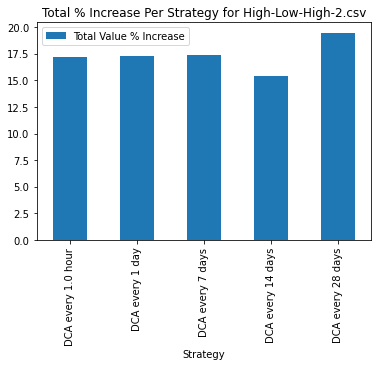

In [2]:
# Compare 'Total value % Increase' for a given price period and category of strategies.
price_period = 'High-Low-High-2.csv'
strategies = 'DCA'
returns_comparison = results_data[
    (results_data['Price_Period']==price_period) &
    (results_data['Strategy'].str.contains(strategies))
    ]
returns_comparison.plot(x='Strategy', y='Total Value % Increase', title=f'Total % Increase Per Strategy for {price_period}', kind='bar', rot='90')

Strategies to look at: 
['DCA every 1.0 hour', 'DCA every 1 day', 'DCA every 7 days', 'DCA every 14 days', 'DCA every 28 days']


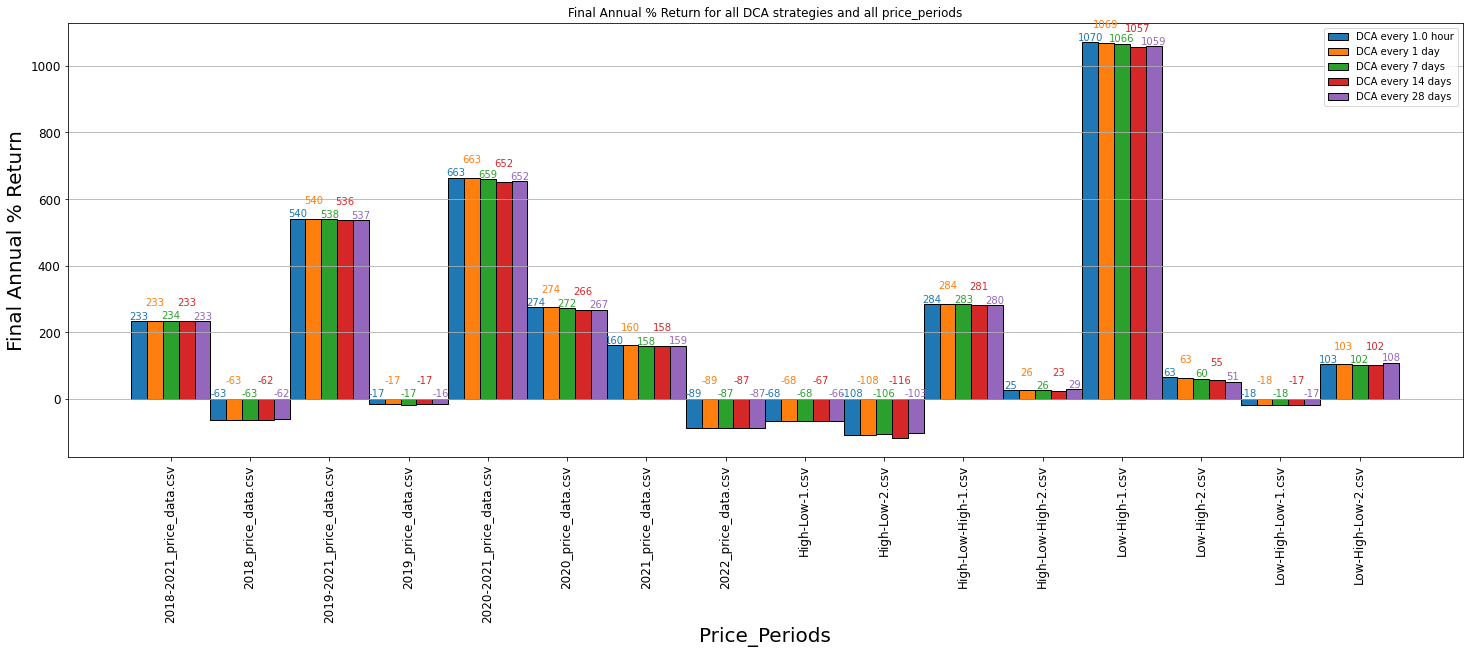

In [5]:
# ---- Version 3 -----
# List of strategies you want to look at
# Auto filter
# strategy_filter = 'DCA'
# strategies_of_interest = [x for x in set(results_data.Strategy.values) if strategy_filter in x]
# Arrange this manually so that they are in the right order
strategies_of_interest = ['DCA every 1.0 hour', 'DCA every 1 day', 'DCA every 7 days', 'DCA every 14 days', 'DCA every 28 days']
print(f'Strategies to look at: \n{strategies_of_interest}')
# List of price_periods you want to look at
price_periods_of_interest = list(set(results_data.Price_Period.values))
# List of variables you want to look at
variables_of_interest = ['Final Annual % Return']
# variables_of_interest = ['Final Annual % Return', 'Sharpe of Returns']
# variables_of_interest = ['Final Annual % Return', 'Sharpe of Returns', 'Trades Made']
# variables_of_interest = ['Total Value % Increase', 'Final Annual % Return', 'Sharpe of Returns', 'Sortino of Returns', 'Trades Made']

# loop over variables you want to plot
for var in variables_of_interest:
    fig = plt.figure(figsize=(25,8))
    bar_width = 0.2
    bar_move = -0.5
    # Alternate by data points to get number text placement to go up and down
    keep_level = True
    # Make a rough adjustment by taking a percent of the largest number
    max_num = results_data[var].loc[results_data['Strategy'].isin(strategies_of_interest)].max()
    # 27 is an approximate number that makes things look good
    num_text_adjust = max_num/27
    # Loop over strategies to plot
    for strat in strategies_of_interest:
        filtered_df = results_data[results_data['Strategy'].str.contains(strat)]
        x = np.arange(len(filtered_df['Price_Period'].unique()))
        # Plot for given strat
        ax = plt.bar(x=x+bar_move, height=filtered_df[var], label=strat, width=bar_width, edgecolor='black')
        
        # Add numbers over the bars
        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            # Use int to round for large numbers
            if bar_value > 2 or bar_value < -2:
                text = f'{int(bar_value)}'
            else:
                text = f'{round(bar_value,2)}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # When text_y is negative, put text at 0 so that it appears above the bar
            if text_y < 0: 
                text_y = 0
            if not keep_level:
                text_y += num_text_adjust
            # If we want the text to be the same color as the bar, we can get the color like so:
            bar_color = bar.get_facecolor()
            plt.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=10)
        # Space between bars, if 0, they overlap completely
        bar_move+=0.2
        keep_level = not keep_level
    plt.legend()
    title = f'{var} for all DCA strategies and all price_periods'
    plt.title(title)
    plt.grid(axis='y')
    plt.xticks(rotation=90, ticks=(x + bar_width / 2)-0.2, labels=filtered_df['Price_Period'].unique())
    plt.ylabel(var, fontdict={'size':20})
    plt.xlabel('Price_Periods', fontdict={'size':20})
    # X and Y axis numbers/names text size
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    
    # Save the image
    fig.savefig(graph_path+title+'.png', format='png', transparent=False, facecolor="white", edgecolor="white", bbox_inches='tight')
    plt.show()


# TODO:
# Add in log() logic when 1 hour is vastly different than 28 days (abstract this)
# Code in logic in a new box to plot 1 price_period vs var as this is too messy and we generally can't compare numbers between price periods

Strategies to look at: 
['DCA every 1.0 hour', 'DCA every 28 days']
price_periods of interest: 
['Low-High-Low-1.csv', 'Low-High-Low-2.csv']


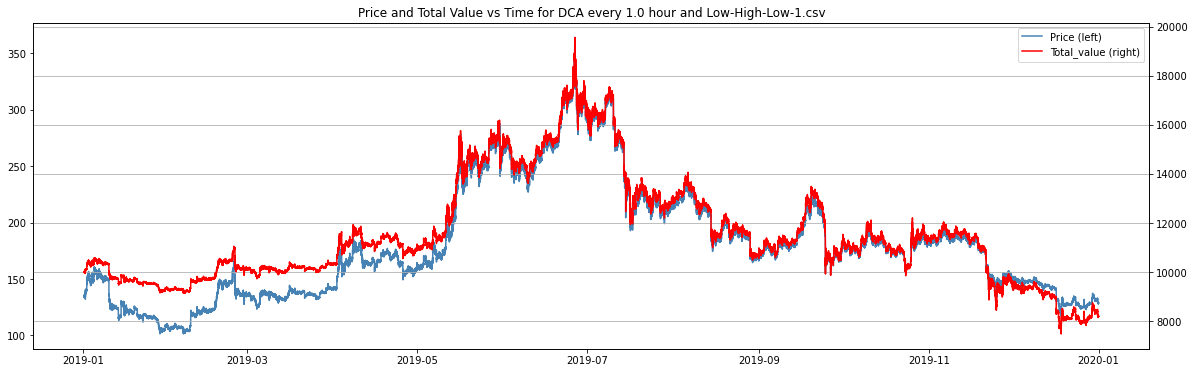

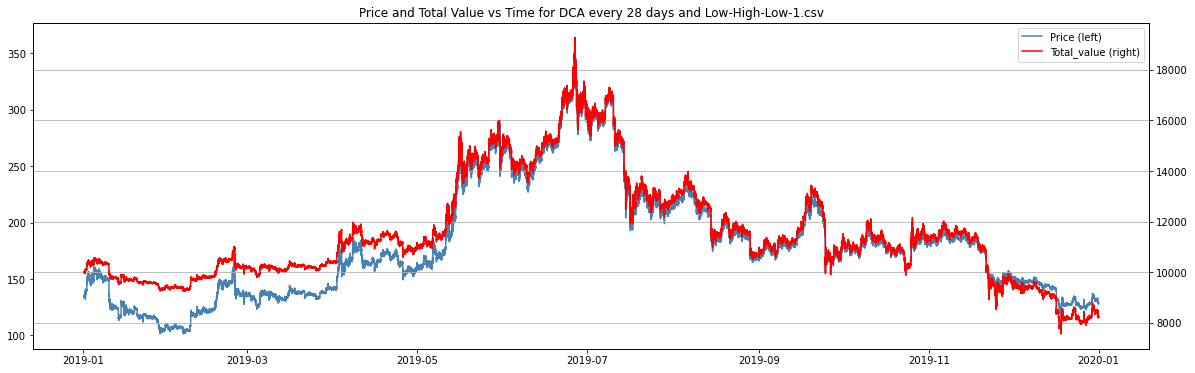

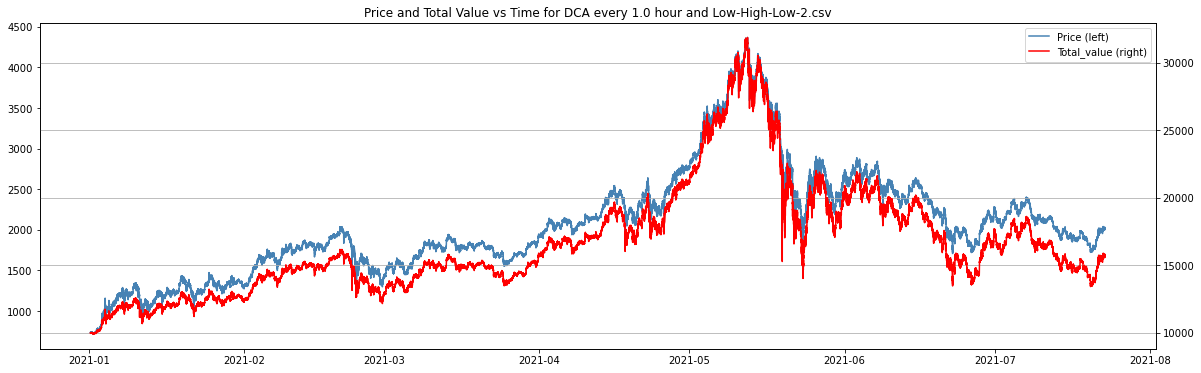

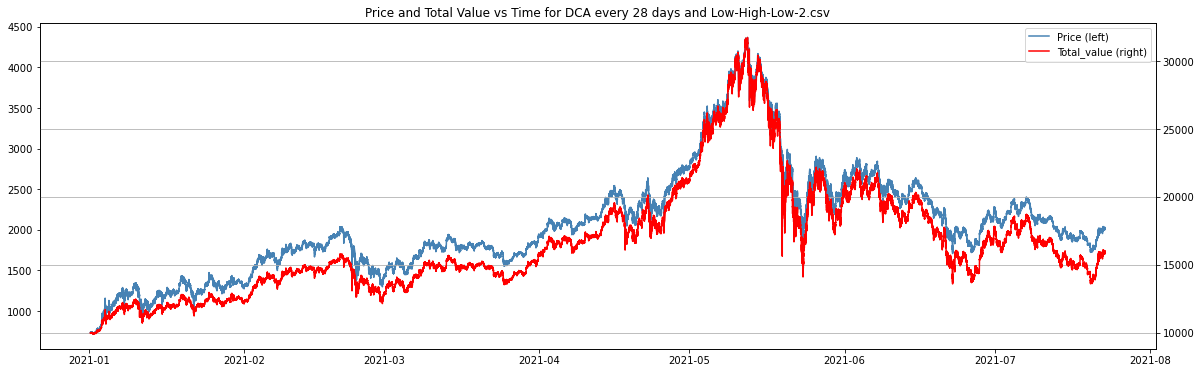

In [6]:
# Create a graph with ETH price and total value vs time for each strategy/price_period 
# List of strategies you want to look at (arrange this manually so that they are in the right order)
strategies_of_interest = ['DCA every 1.0 hour', 'DCA every 28 days']
# strategies_of_interest = ['DCA every 1.0 hour', 'DCA every 1 day', 'DCA every 7 days', 'DCA every 14 days', 'DCA every 28 days']
print(f'Strategies to look at: \n{strategies_of_interest}')
# List of price_periods you want to look at
# price_periods_of_interest = list(set(results_data.Price_Period.values))
price_periods_of_interest = ['Low-High-Low-1.csv', 'Low-High-Low-2.csv']
print(f'price_periods of interest: \n{price_periods_of_interest}')
# List of variables you want to look at
variables_of_interest = ['ETH price', 'total_value']
#define colors to use
col1 = 'steelblue'
col2 = 'red'

for price_period in price_periods_of_interest:
    for strategy in strategies_of_interest:
        # read in data and replace spaces with '_'
        file_name = f"results/returns_history/{strategy}_{price_period}_returns_history.csv"
        price_data = pd.read_csv(file_name)
        # turn timestamp into a date
        # pd.to_datetime(data['timestamp'].iloc[0], unit='s')
        price_data['date'] = pd.to_datetime(price_data['timestamp'], unit='s')

        # plot timestamp, price and total_value data
        fig,ax = plt.subplots(figsize=(20,6))
        # plot1, = ax.plot(price_data['timestamp'], price_data['price'], color=col1)
        plot1, = ax.plot(price_data['date'], price_data['price'], color=col1)
        ax2 = ax.twinx()
        # plot2, = ax2.plot(price_data['timestamp'], price_data['Total Value'], color=col2)
        plot2, = ax2.plot(price_data['date'], price_data['Total Value'], color=col2)
        plt.legend([plot1, plot2], ['Price (left)', 'Total_value (right)'])
        title = f'Price and Total Value vs Time for {strategy} and {price_period}'
        plt.title(title)
        plt.grid(axis='y')
        # Save the image
        fig.savefig(graph_path+title+'.png', format='png', transparent=False, facecolor="white", edgecolor="white", bbox_inches='tight')

In [7]:
# Add numbers over the bars
        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            # Use int to round for large numbers
            if bar_value > 2 or bar_value < -2:
                text = f'{int(bar_value)}'
            else:
                text = f'{round(bar_value,2)}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # When text_y is negative, put text at 0 so that it appears above the bar
            if text_y < 0: 
                text_y = 0
            if not keep_level:
                text_y += num_text_adjust
            # If we want the text to be the same color as the bar, we can get the color like so:
            bar_color = bar.get_facecolor()
            plt.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=10)

IndentationError: unexpected indent (Temp/ipykernel_26240/2843135953.py, line 2)

In [ ]:
# Create a graph with number of trades, sortino value, ending total value and sortino/ending_value (used to show risk/volatility) for each strategy in a given price_period 
# https://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
print('Version 1') # TODO: remove this print

# List of strategies you want to look at
# Arrange this manually so that they are in the right order
strategies_of_interest = ['DCA every 1.0 hour', 'DCA every 1 day', 'DCA every 7 days', 'DCA every 14 days', 'DCA every 28 days']
print(f'Strategies to look at: \n{strategies_of_interest}')
# List of price_periods you want to look at
# price_periods_of_interest = list(set(results_data.Price_Period.values))
price_periods_of_interest = ['Low-High-Low-1.csv', 'Low-High-Low-2.csv']
print(f'price_periods of interest: \n{price_periods_of_interest}')
# List of variables you want to look at
variables_of_interest = ['Sharpe of Returns', 'Sortino of Returns', 'Final Annual % Return', 'Final Return-Sortino ratio', 'Trades Made']
results_data['Sortino of Returns'] = results_data['Sortino of Returns'].replace('None', None)
# Create 'Final Return-Sortino ratio' column (return/sortino) (higher risk = lower value)
results_data['Final Return-Sortino ratio'] = results_data['Final Annual % Return']/results_data['Sortino of Returns'].fillna(np.inf).astype(float)

list_of_ax = []

# price_periods are a group of graphs, strategies are the 'x', the variable to compare is the 'y'
# loop over the price_periods
for price_period in price_periods_of_interest:
    # Create overall graph (subplot) logic here
    # fig = plt.figure(figsize=(25,8))
    # Make vertical subplots
    fig, axes = plt.subplots(len(variables_of_interest), 1, figsize=(25,4*len(variables_of_interest)))
    # Keeps track of which subplot we are on
    current_subplot = 0
    # loop over the variables
    for variable in variables_of_interest:
        # plot this variable in the plot that matches its position
        filtered_df = results_data[
                (results_data['Strategy'].isin(strategies_of_interest)) &
                (results_data['Price_Period'].str.contains(price_period))
            ]
        # x = np.arange(len(filtered_df['Price_Period'].unique()))
        # TODO: Break into individual plots. Its just easier to get the formatting correct
        ax = axes[current_subplot].bar(x=strategies_of_interest, height=filtered_df[variable], label=strat, width=bar_width, edgecolor='black')
        axes[current_subplot].set_ylabel(variable)
        list_of_ax.append(ax) 
        # go to next subplot
        current_subplot += 1
    
        plt.legend()
        title = f'test'
        plt.title(title)
        plt.grid(axis='y')
    
    # Add numbers over the bars
    for ax in list_of_ax:
        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            # Use int to round for large numbers
            if bar_value > 2 or bar_value < -2:
                text = f'{int(bar_value)}'
            else:
                text = f'{round(bar_value,2)}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # When text_y is negative, put text at 0 so that it appears above the bar
            if text_y < 0: 
                text_y = 0
            if not keep_level:
                text_y += num_text_adjust
            # If we want the text to be the same color as the bar, we can get the color like so:
            bar_color = bar.get_facecolor()
            plt.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=10)  
    plt.show()



# # loop over variables you want to plot
# for var in variables_of_interest:
#     fig = plt.figure(figsize=(25,8))
#     f, axes = plt.subplots(len(variables_of_interest), 1)
#     # axes[0].plot(x, y1)
#     # axes[0].set_ylabel('y1')

#     # axes[1].plot(x, y2)
#     # axes[1].set_ylabel('y2')


Strategies to look at: 
['DCA every 1.0 hour', 'DCA every 1 day', 'DCA every 7 days', 'DCA every 14 days', 'DCA every 28 days']
price_periods of interest: 
['2018-2021_price_data.csv', 'High-Low-High-1.csv', 'High-Low-High-2.csv']

Price_period: 2018-2021_price_data.csv


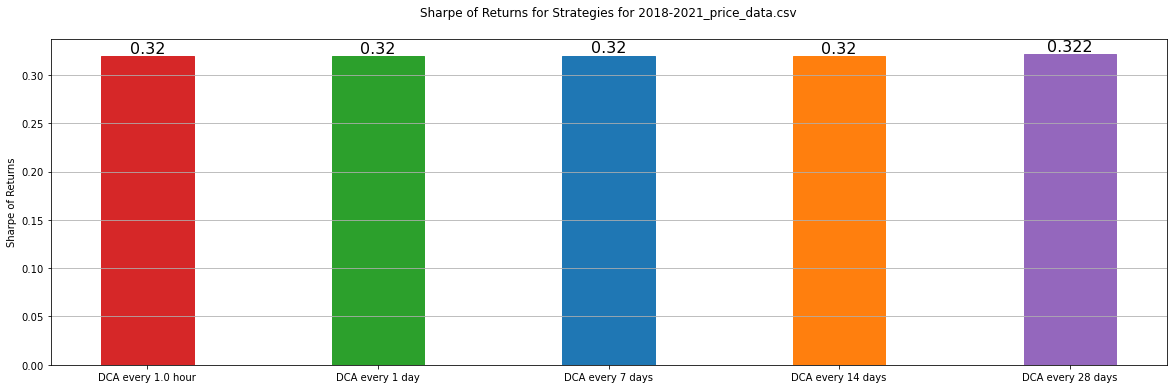

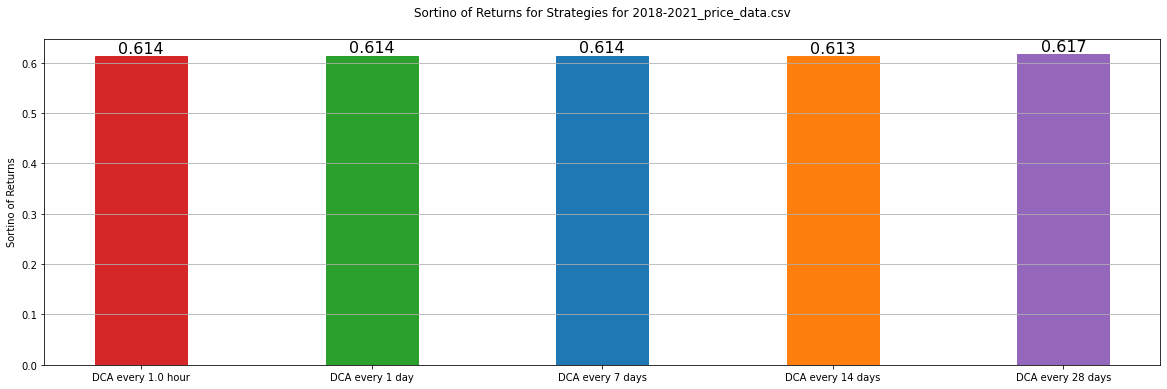

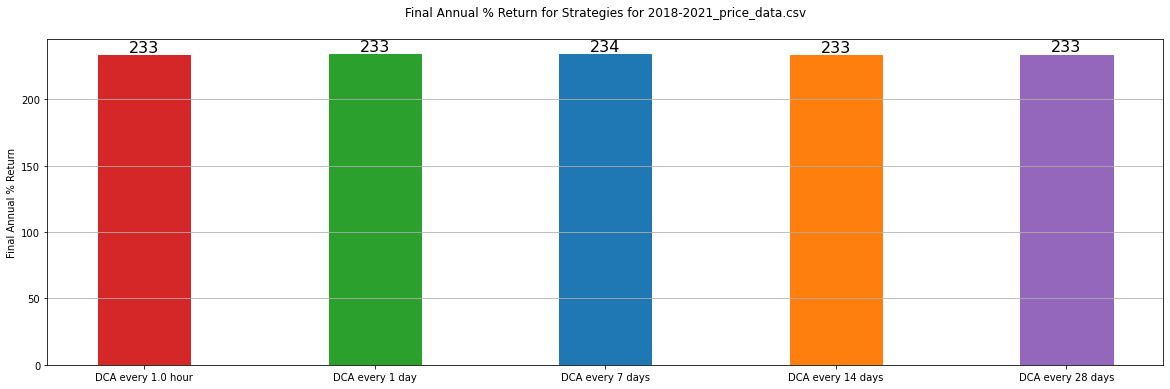

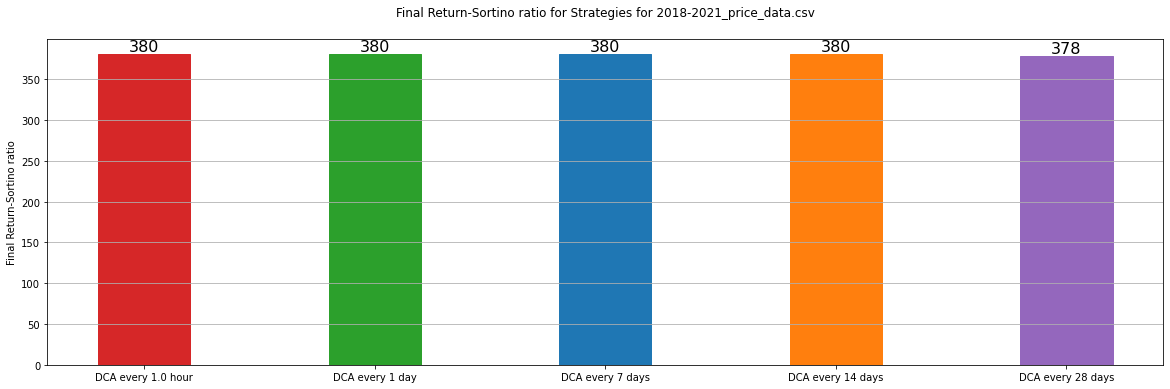

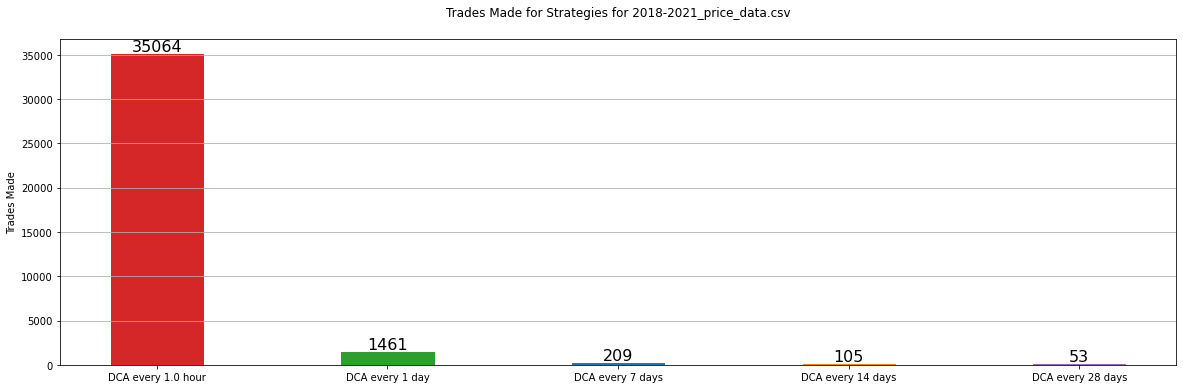


Price_period: High-Low-High-1.csv


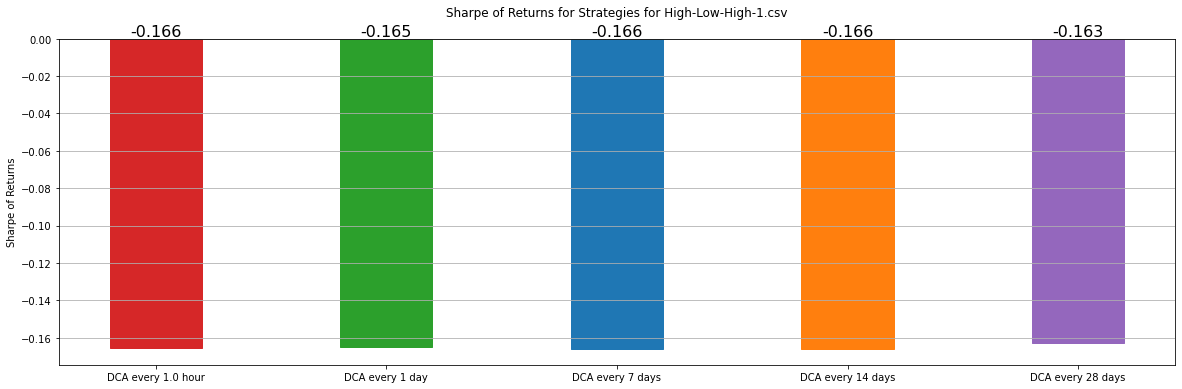

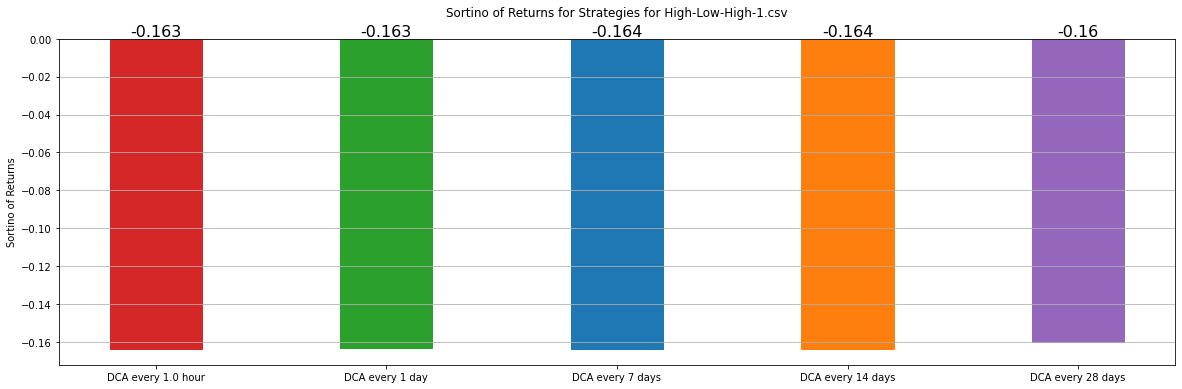

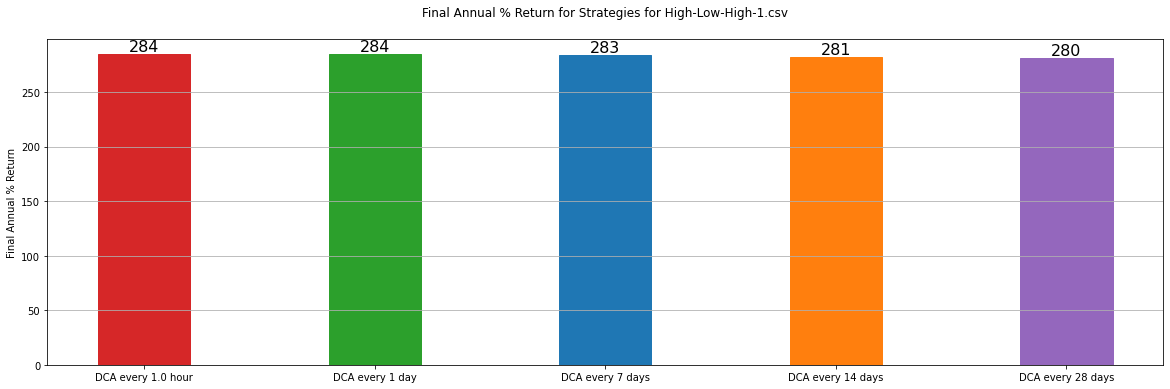

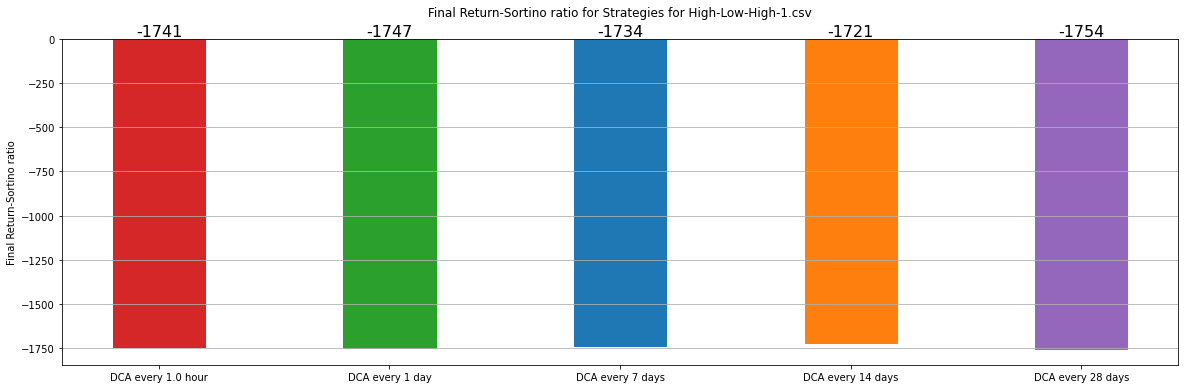

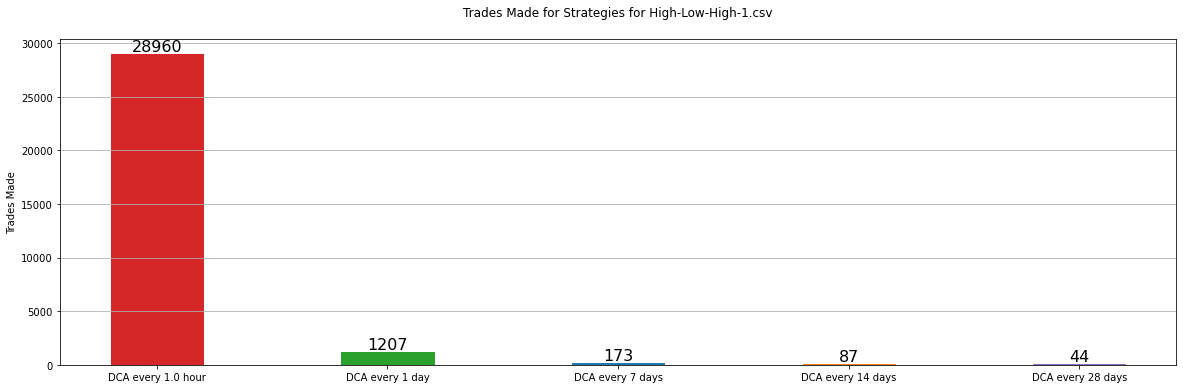


Price_period: High-Low-High-2.csv


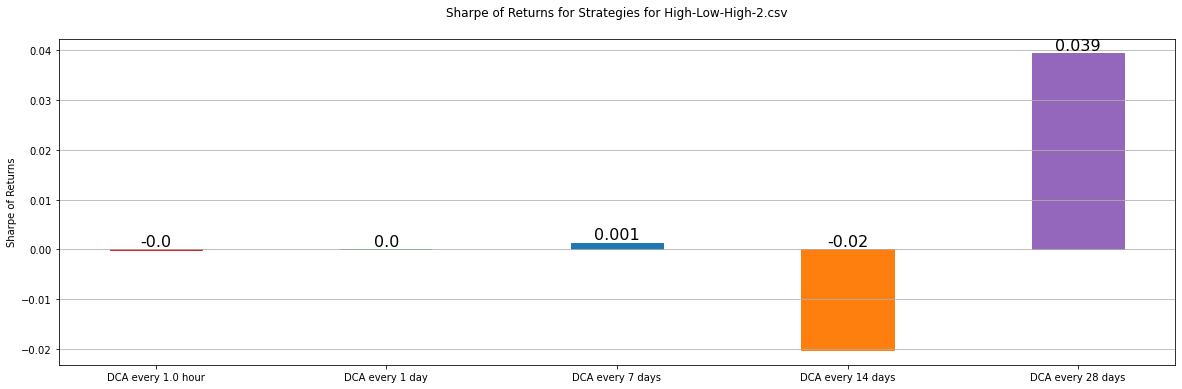

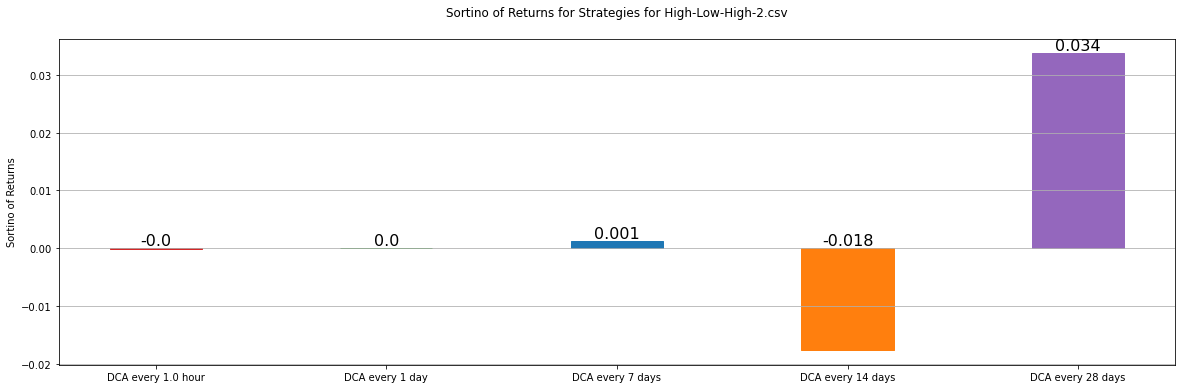

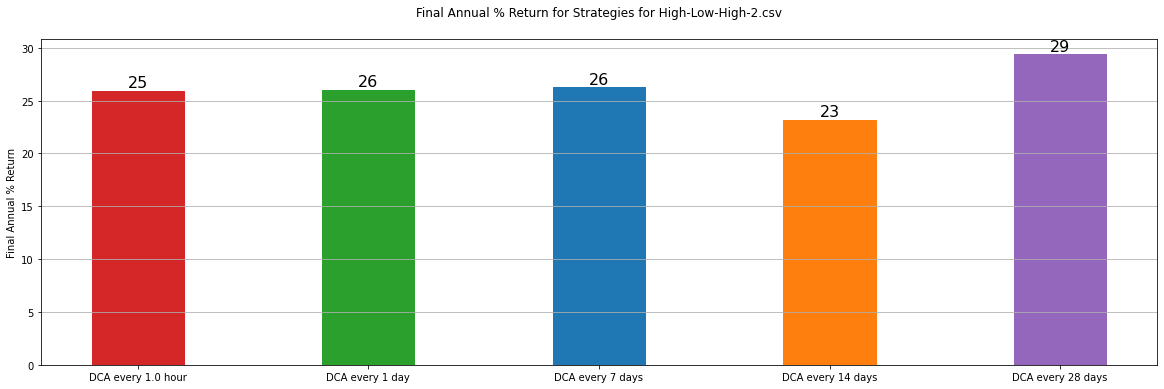

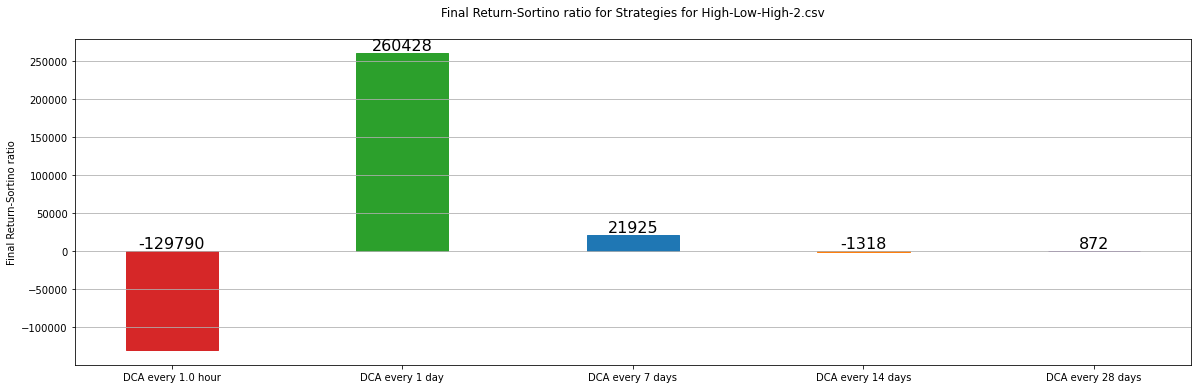

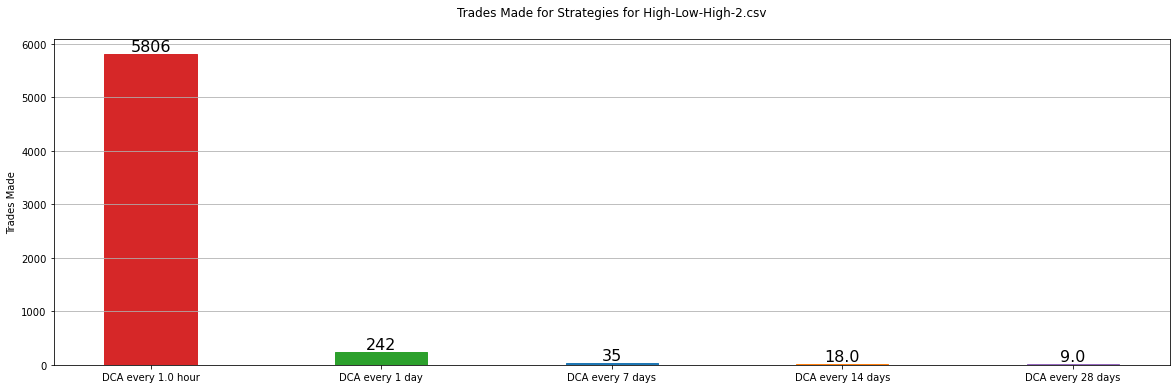

In [9]:
# Create a graph with number of trades, sortino value, ending total value and sortino/ending_value (used to show risk/volatility) for each strategy in a given price_period 
# Individual graph version

# List of strategies you want to look at
# Arrange this manually so that they are in the right order
# strategies_of_interest = ['DCA every 1.0 hour', 'DCA every 28 days']
strategies_of_interest = ['DCA every 1.0 hour', 'DCA every 1 day', 'DCA every 7 days', 'DCA every 14 days', 'DCA every 28 days']
print(f'Strategies to look at: \n{strategies_of_interest}')
# List of price_periods you want to look at
# price_periods_of_interest = list(set(results_data.Price_Period.values))
# price_periods_of_interest = ['Low-High-Low-1.csv', 'Low-High-Low-2.csv']
price_periods_of_interest = ['2018-2021_price_data.csv', 'High-Low-High-1.csv', 'High-Low-High-2.csv']
print(f'price_periods of interest: \n{price_periods_of_interest}')
# List of variables you want to look at
variables_of_interest = ['Sharpe of Returns', 'Sortino of Returns', 'Final Annual % Return', 'Final Return-Sortino ratio', 'Trades Made']
results_data['Sortino of Returns'] = results_data['Sortino of Returns'].replace('None', None)
# Create 'Final Return-Sortino ratio' column (return/sortino) (higher risk = lower value)
results_data['Final Return-Sortino ratio'] = results_data['Final Annual % Return']/results_data['Sortino of Returns'].fillna(np.inf).astype(float)



bar_width = 0.4

# price_periods are a group of graphs, strategies are the 'x', the variable to compare is the 'y'
# loop over the price_periods
for price_period in price_periods_of_interest:
    print(f'\nPrice_period: {price_period}')
    # loop over the variables
    for variable in variables_of_interest:
        # Create overall graph (subplot) logic here
        fig = plt.figure(figsize=(20,6))

        # plot this variable in the plot that matches its position
        filtered_df = results_data[
                (results_data['Strategy'].isin(strategies_of_interest)) &
                (results_data['Price_Period'].str.contains(price_period))
            ]
        
        # Use astype float due to Sortino values being strings (because of NA values)
        ax = plt.bar(x=strategies_of_interest, height=filtered_df[variable].astype(float), width=bar_width, edgecolor='black')

    
        # plt.legend()
        title = f'{variable} for Strategies for {price_period}'
        # Move title upwards by 1.05
        plt.title(title, y=1.05)
        plt.ylabel(variable)
        plt.grid(axis='y')

        # Start colors at beginning
        color_position = 0
        # Add numbers over the bars
        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()

            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            # Use int to round for large numbers
            if bar_value > 20 or bar_value < -20:
                text = f'{int(bar_value)}'
            elif bar_value > 2 or bar_value < -2:
                text = f'{round(bar_value, 1)}'
            else:
                text = f'{round(bar_value, 3)}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # When text_y is negative, put text at 0 so that it appears above the bar
            if text_y < 0: 
                text_y = 0
            # Set the bar color
            bar.set_color(color_list[color_position])
            # Go to next color
            color_position += 1
            # If we want the text to be the same color as the bar, we can get the color like so:
            # bar_color = bar.get_facecolor()
            # Or just use black for a nice contrast
            bar_color = 'black'

            plt.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=16)  
        
        plt.savefig(fname='results/graphs/'+title[:-3]+'png', format='png', transparent=False, facecolor='white', edgecolor='white', bbox_inches='tight')
        plt.show()

        # Save the image
        # fig.savefig(graph_path+title+'.png', format='png', transparent=False, facecolor="white", edgecolor="white", bbox_inches='tight')



In [51]:
def create_df_barh_plot(df: pd.DataFrame, x: str, y: str, title: str, xticks: list=[], legend_loc: str='upper right', use_xticks: bool=False, figsize: list=[10,5], save_fig: bool=True):
    if use_xticks:
        ax = df.plot.barh(
            x=x, y=y,
            title=title, 
            figsize=figsize, grid=True,
            xticks=xticks,
        )
    else:
        ax = df.plot.barh(
            x=x, y=y,
            title=title, 
            figsize=figsize, grid=True, 
        )
    # eg 'upper left' or 'upper right'
    ax.legend(loc=legend_loc)
    # Assign to a variable so it isn't printed
    label_values = ax.bar_label(ax.containers[0])
    if save_fig:
        # Get rid of troublesome title characters
        title = title.replace(',', '').replace('"', '')
        ax.get_figure().savefig(fname='results/graphs/'+title+'.png', format='png', transparent=False, facecolor='white', edgecolor='white', bbox_inches='tight')

--- Compare "DCA every 1 day" verses "DCA every 28 days" ---
Total Value % Increase Diff
1 positive unit of DCA_Diff means "DCA every 1 day" gave a flat 1% better return than "DCA every 28 days"
A +12 DCA_Diff means "DCA every 1 day" gave a flat 12% better return
Mean of DCA_Diff: 3.86
Median of DCA_Diff: -0.22

Final Annual % Return Diff
Mean of Annual_DCA_Diff: 1.87
Median of Annual_DCA_Diff: -0.26

Sharpe of Returns Diff
Mean of Sharpe_Diff: -0.0083
Median of Sharpe_Diff: -0.0056

Sortino of Returns Diff
Mean of Sortino_Diff: -0.0129
Median of Sortino_Diff: -0.0027

Trades Made Diff
Using a GAS cost of 50$ per trade or 0.05 ETH. Aka an ETH price of ~$1000.
Smallest Trades Made cost difference: $3850.0 or 3.85 ETH
Largest Trades Made cost difference: $70400.0 or 70.4 ETH


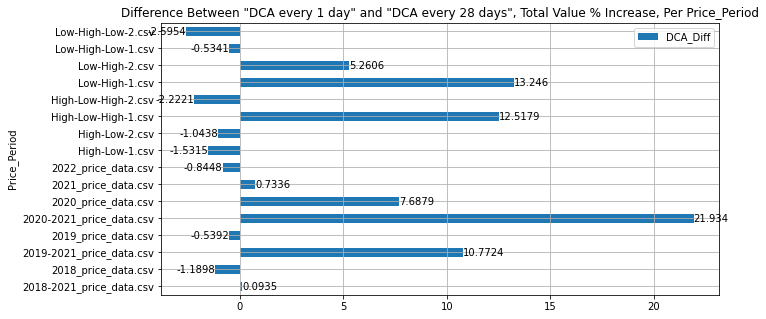

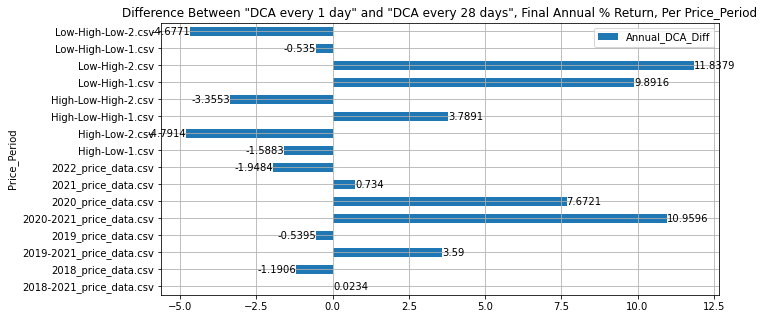

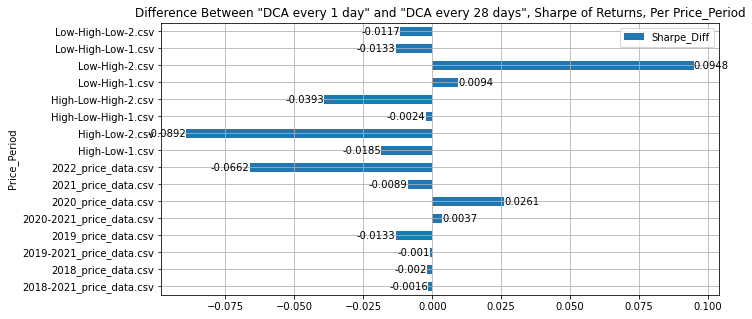

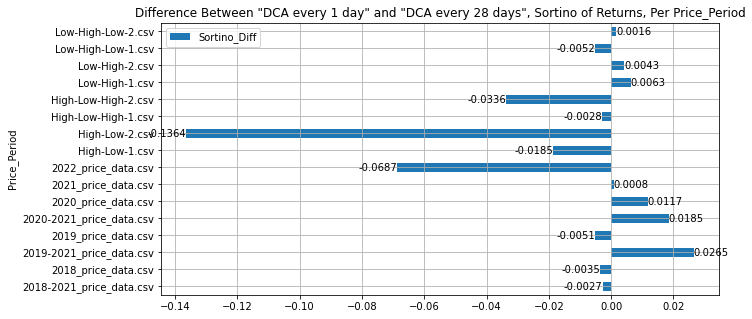

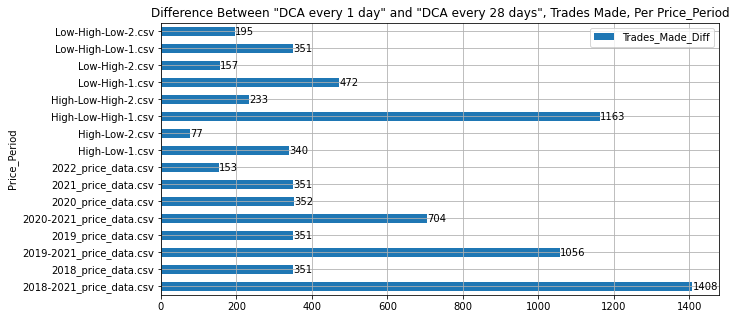

In [53]:
# DCA every hour verses every 28 days
# strategy_1 = 'DCA every 1.0 hour'
strategy_1 = 'DCA every 1 day'
# strategy_1 = 'DCA every 7 days'

# strategy_2 = 'DCA every 7 days'
strategy_2 = 'DCA every 28 days'

print(f'--- Compare "{strategy_1}" verses "{strategy_2}" ---')

# Make new df with a column of price_periods and the results you want to track (empty right now)
strategy_diff_df = pd.DataFrame(columns=['Price_Period', 'DCA_Diff', 'Annual_DCA_Diff' ,'Sharpe_Diff', 'Sortino_Diff', 'Trades_Made_Diff'])
# Add all of the Price_Period data
strategy_diff_df['Price_Period'] = list(set(results_data.Price_Period.values))
# Sort Price_Period's alphabetically
strategy_diff_df = strategy_diff_df.sort_values('Price_Period')
# print(strategy_diff_df)
# Loop through the set of price_periods in the dataframe
for price_period in strategy_diff_df.Price_Period:
    # Define our rows that we want to look at so we can reuse code
    strategy_1_row = (results_data['Price_Period']==price_period) & (results_data['Strategy']==strategy_1)
    strategy_2_row = (results_data['Price_Period']==price_period) & (results_data['Strategy']==strategy_2)

    # For a given price_period, find the difference of the strategy_1 and strategy_2 'Total Value % Increase' values 
    # Use 'Final Annual % Return' instead of 'Total Value % Increase' for a time weighted return
    strategy_1_TVI = results_data['Total Value % Increase'].loc[strategy_1_row].values[0]
    strategy_2_TVI = results_data['Total Value % Increase'].loc[strategy_2_row].values[0]
    # save that to the new df row for that strat
    strategy_diff_df['DCA_Diff'].loc[strategy_diff_df['Price_Period']==price_period] = strategy_1_TVI-strategy_2_TVI

    # Final Annual % Return, weight returns by time
    strategy_1_annual_return = results_data['Final Annual % Return'].loc[strategy_1_row].values[0]
    strategy_2_annual_return = results_data['Final Annual % Return'].loc[strategy_2_row].values[0]
    # save that to the new df row for that strat
    strategy_diff_df['Annual_DCA_Diff'].loc[strategy_diff_df['Price_Period']==price_period] = strategy_1_annual_return-strategy_2_annual_return

    # Sharpe of returns, shows how volatile the returns were
    strategy_1_Sharpe = float(results_data['Sharpe of Returns'].loc[strategy_1_row].values[0])
    strategy_2_Sharpe = float(results_data['Sharpe of Returns'].loc[strategy_2_row].values[0])
    # save that to the new df row for that strat
    strategy_diff_df['Sharpe_Diff'].loc[strategy_diff_df['Price_Period']==price_period] = strategy_1_Sharpe-strategy_2_Sharpe

    # Sortino of returns, show how negatively volatile the returns were
    strategy_1_Sortino = float(results_data['Sortino of Returns'].loc[strategy_1_row].values[0])
    strategy_2_Sortino = float(results_data['Sortino of Returns'].loc[strategy_2_row].values[0])
    # save that to the new df row for that strat
    strategy_diff_df['Sortino_Diff'].loc[strategy_diff_df['Price_Period']==price_period] = strategy_1_Sortino-strategy_2_Sortino

    # Add difference between trades made
        # Highlights how time/GAS efficient the 28 day DCA is
    strategy_1_Trades_Made = float(results_data['Trades Made'].loc[strategy_1_row].values[0])
    strategy_2_Trades_Made = float(results_data['Trades Made'].loc[strategy_2_row].values[0])
    # save that to the new df row for that strat
    strategy_diff_df['Trades_Made_Diff'].loc[strategy_diff_df['Price_Period']==price_period] = strategy_1_Trades_Made-strategy_2_Trades_Made

# Total Value % Increase plot
print('Total Value % Increase Diff')
print(f'1 positive unit of DCA_Diff means "{strategy_1}" gave a flat 1% better return than "{strategy_2}"')
print(f'A +12 DCA_Diff means "{strategy_1}" gave a flat 12% better return')
print(f'Mean of DCA_Diff: {round(strategy_diff_df.DCA_Diff.mean(),2)}')
print(f'Median of DCA_Diff: {round(strategy_diff_df.DCA_Diff.median(),2)}')
# strategy_diff_df.plot(y='Price_Period', x='DCA_Diff',
#     title=f'Difference Between "{strategy_1}" and "{strategy_2}", Total Value % Increase, Per Price_Period', kind='scatter', 
#     figsize=[10,5], grid=True,
#     xticks=range(-3,25),
# )
create_df_barh_plot(strategy_diff_df,x='Price_Period', y='DCA_Diff',
    title=f'Difference Between "{strategy_1}" and "{strategy_2}", Total Value % Increase, Per Price_Period',
    xticks=range(-3,25),
)

# Final Annual % Return
print('\nFinal Annual % Return Diff')
print(f'Mean of Annual_DCA_Diff: {round(strategy_diff_df.Annual_DCA_Diff.mean(),2)}')
print(f'Median of Annual_DCA_Diff: {round(strategy_diff_df.Annual_DCA_Diff.median(),2)}')
# strategy_diff_df.plot(y='Price_Period', x='Annual_DCA_Diff',
#     title=f'Difference Between "{strategy_1}" and "{strategy_2}", Final Annual % Return, Per Price_Period', kind='scatter', 
#     figsize=[10,5], grid=True,
#     xticks=range(-3,25),
# )
create_df_barh_plot(strategy_diff_df,x='Price_Period', y='Annual_DCA_Diff',
    title=f'Difference Between "{strategy_1}" and "{strategy_2}", Final Annual % Return, Per Price_Period',
    xticks=range(-3,25),
)

# Sharpe of Returns plot
print('\nSharpe of Returns Diff')
print(f'Mean of Sharpe_Diff: {round(strategy_diff_df.Sharpe_Diff.mean(),4)}')
print(f'Median of Sharpe_Diff: {round(strategy_diff_df.Sharpe_Diff.median(),4)}')
# strategy_diff_df.plot(y='Price_Period', x='Sharpe_Diff',
#     title=f'Difference Between "{strategy_1}" and "{strategy_2}", Sharpe of Returns, Per Price_Period', kind='scatter', 
#     figsize=[10,5], grid=True,
# )
create_df_barh_plot(strategy_diff_df,x='Price_Period', y='Sharpe_Diff',
    title=f'Difference Between "{strategy_1}" and "{strategy_2}", Sharpe of Returns, Per Price_Period'
)

# Sortino of Returns plot
print('\nSortino of Returns Diff')
print(f'Mean of Sortino_Diff: {round(strategy_diff_df.Sortino_Diff.mean(),4)}')
print(f'Median of Sortino_Diff: {round(strategy_diff_df.Sortino_Diff.median(),4)}')
create_df_barh_plot(strategy_diff_df,x='Price_Period', y='Sortino_Diff',
    title=f'Difference Between "{strategy_1}" and "{strategy_2}", Sortino of Returns, Per Price_Period',
    legend_loc='upper left'
)

# Trades Made plot
print('\nTrades Made Diff')
usd_gas = 50
eth_gas = .05
print(f'Using a GAS cost of {usd_gas}$ per trade or {eth_gas} ETH. Aka an ETH price of ~${int(usd_gas/eth_gas)}.')
print(f'Smallest Trades Made cost difference: ${strategy_diff_df.Trades_Made_Diff.min()*usd_gas} or {round(strategy_diff_df.Trades_Made_Diff.min()*eth_gas,3)} ETH')
print(f'Largest Trades Made cost difference: ${strategy_diff_df.Trades_Made_Diff.max()*usd_gas} or {round(strategy_diff_df.Trades_Made_Diff.max()*eth_gas,3)} ETH')
create_df_barh_plot(strategy_diff_df,x='Price_Period', y='Trades_Made_Diff',
    title=f'Difference Between "{strategy_1}" and "{strategy_2}", Trades Made, Per Price_Period'
)
